In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(station).first()
second_row = session.query(measurement).first()

# Exploratory Precipitation Analysis

In [10]:
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

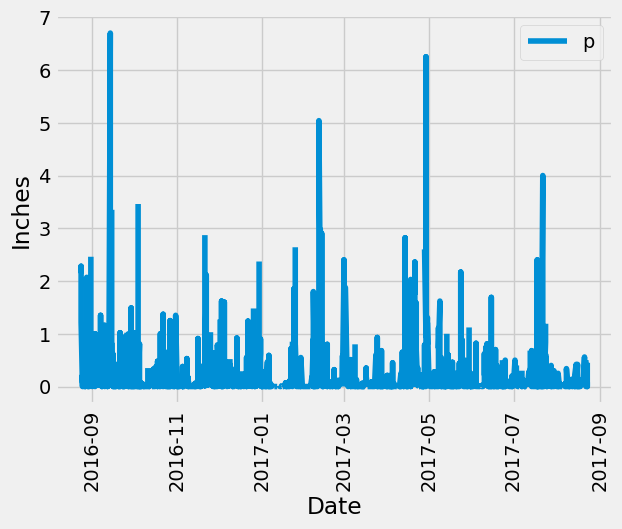

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year from the most recent date
one_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(query, columns=["date", "precipitation"])

precipitation_df["date"] = pd.to_datetime(precipitation_df["date"])
precipitation_df.sort_values("date", inplace=True)

# Plot the data using Pandas plotting with Matplotlib

plt.plot(precipitation_df['date'], precipitation_df["precipitation"])
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend("precipitation")
plt.show()


In [12]:
print(most_recent_date)

2017-08-23 00:00:00


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
count_precipitation = precipitation_df["precipitation"].count()
mean_precipitation = precipitation_df["precipitation"].mean()
std_dev_precipitation = precipitation_df["precipitation"].std()
min_precipitation = precipitation_df["precipitation"].min()
quarter_percipitation = precipitation_df["precipitation"].quantile(0.25)
half_percipitation = precipitation_df["precipitation"].quantile(0.50)
three_forths_percipitation = precipitation_df["precipitation"].quantile(0.75)
max_precipitation = precipitation_df["precipitation"].max()
print(f"Count: {count_precipitation}")
print(f"Mean: {mean_precipitation}")
print(f"Standard Deviation: {std_dev_precipitation}")
print(f"Min: {min_precipitation}")
print(f"25%: {quarter_percipitation}")
print(f"50%: {half_percipitation}")
print(f"75%: {three_forths_percipitation}")
print(f"Max: {max_precipitation}")

Count: 2015
Mean: 0.17646153846153845
Standard Deviation: 0.4602883636813204
Min: 0.0
25%: 0.0
50%: 0.02
75%: 0.13
Max: 6.7


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(measurement.station).distinct().count()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count().label("count")).group_by(measurement.station).order_by(func.count().desc()).all()
for station, count in active_stations:
    print(f"{station}: {count}")

USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = "USC00519281"
temperature_stats = session.query(
    func.min(measurement.tobs).label("min_temp"),
    func.max(measurement.tobs).label("max_temp"),
    func.avg(measurement.tobs).label("avg_temp")
).filter(measurement.station == most_active_station_id).one()

# Print the results
print(f"Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {temperature_stats.min_temp}")
print(f"Highest Temperature: {temperature_stats.max_temp}")
print(f"Average Temperature: {temperature_stats.avg_temp}")

Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


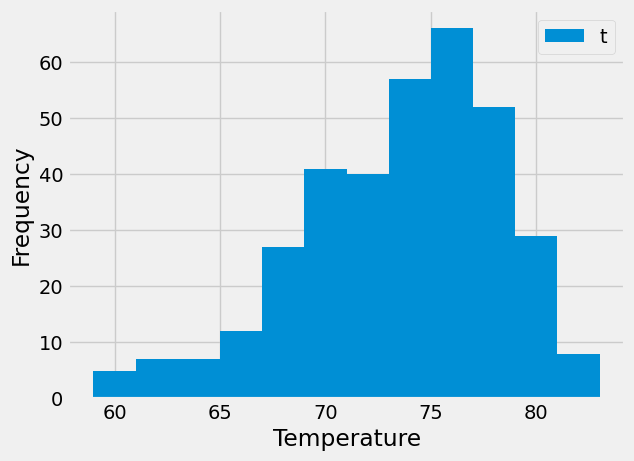

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_data = session.query(measurement.tobs).filter(
    measurement.station == most_active_station_id,
    measurement.date >= one_year_ago,
    measurement.date <= most_recent_date
).all()
tobs_data = pd.DataFrame(last_12_months_data, columns=["tobs"])
plt.hist(tobs_data["tobs"], bins=12,)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()

# Close Session

In [19]:
# Close Session
session.close()